In [1]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [2]:
### State define
class Area_Reactangle_state(TypedDict):
    width : float
    height : float
    area : float

In [3]:
### Create Graph
graph = StateGraph(Area_Reactangle_state)

In [4]:
def calculate_area_reactangle(state:Area_Reactangle_state) -> Area_Reactangle_state:
    width = state['width']
    height  = state['height']
    
    result = (width * height)
    state['area'] =  result
    
    return state

In [5]:
### add node to your graph
### workflow like -- Input->Calculate -> Output
graph.add_node("calculate_area_reactangle",calculate_area_reactangle)  ## node is nothing but your python function (above)

In [6]:
### Add edge to your graph
# START -> CALCULATE -> END
    ## first edge --- Start to Calculate
    ## Second edge ---- Calculate to End
graph.add_edge(START,"calculate_area_reactangle")
graph.add_edge("calculate_area_reactangle", END)

In [7]:
### Compile the Graph
workflow  = graph.compile()

In [8]:
### Execute the Graph
initial_state={"width":30,"height":40}
final_state = workflow.invoke(initial_state)

In [9]:
## print final state
print(final_state)

{'width': 30, 'height': 40, 'area': 1200}


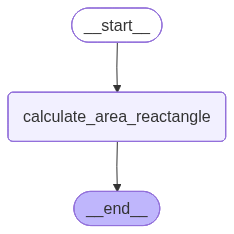

In [10]:
### se your workflow graph

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())